Rotating disk electrode
----

Make plots for this particular case since we also have the theoretical value at steady state to determine which is accurate. For a RDE comparison to DigiElch 7 which includes surface confined reactions see test named ``ads03``.

For a concentration in solution of $C$, the Levich current is given by

\\[
I_L = (0.620) n F A D^{2/3} \omega^{1/2} \nu^{-1/6} C
\\]
where
* $n$ is the number of electrons transfered in a single reaction (mol$^{-1}$)
* $F = 96485.33289$ C/mol is Faraday's constant, $A$ is the area (cm$^2$)
* $D$ is the diffusion coefficient of species $C$ (cm$^2$/s)
* $\omega$ is the angular rotation rate (rad/s)
* $\nu$ is the kinematic viscosity (cm$^2$/s) 
* $C$ is the analyte concentration (mol/cm$^3$).

In [1]:
# import required python packages
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# load t,E,i from MECSim debug file
time, eapp, current = np.loadtxt('EC_Model.tvc',usecols=(0,1,2), unpack=True, skiprows=1)
Iss_Sim = current.min()
ndatapoints = eapp.size
Iss_Rev = current[ndatapoints/2]
print 'Current min/mean/max = ',current.min(),current.mean(),current.max()
print '  E_app min/mean/max = ',eapp.min(),eapp.mean(),eapp.max()
print '    Current at E_rev = ',Iss_Rev


Current min/mean/max =  -9.6369741909e-05 -4.81785811454e-05 -0.0
  E_app min/mean/max =  9.3817558973e-14 0.50002499875 1.0
    Current at E_rev =  -9.6369741909e-05


In [3]:
RDE_radius = 0.178412412
RDE_rotation = 261.79938779914943653855361527329
RDE_viscosity = 1.0e-2
RDE_diffusion = 1.0e-5
RDE_conc = 1.0e-6
RDE_area = np.pi*(RDE_radius**2.0)
F = 96485.33289
ne = 1.0
iLevich = (-0.620*ne*F*RDE_area*(RDE_diffusion**(2.0/3.0))*(RDE_rotation**0.5)
           *(RDE_viscosity**(-1.0/6.0))*RDE_conc)
print iLevich, iLevich/current.min()

-9.67915187198e-05 1.00437665187


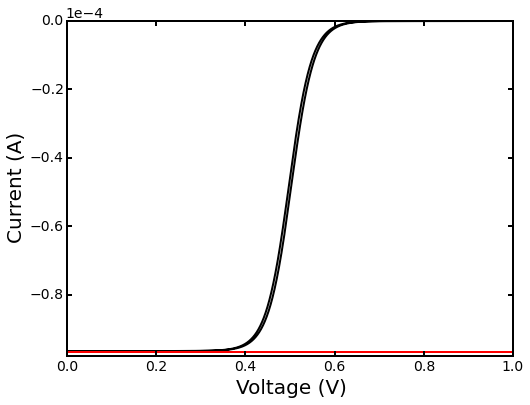

In [4]:
plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
plt.plot(eapp,current, 'k', label='A', linewidth=2)
plt.plot([plt.xlim()[0], plt.xlim()[1]],[iLevich, iLevich], 'r')
plt.ylim(1.01*iLevich, plt.ylim()[1])
plt.xlabel('Voltage (V)', fontsize=20)
plt.ylabel('Current (A)', fontsize=20)
plt.savefig('RDETest.png')
plt.savefig('RDETest.ps')
plt.savefig('RDETest.pdf')

The red line above corresponds to the theoretical value from Zhang & Bond 2007 and the black curve is the simulation results from MECSim.